##### 48.5/50

## Abstract (in 200 words or less explain what you set out to do and what you found)

We set out to analyze any trends in data from AirBnbs in San Francisco. Neither of us knew much about the airbnb market so it was fun to play around with the data and apparent relationships we observed. We explored if there really was a price difference in prices of entire homes / apartments versus hotel rooms and we found that we could not reject our null hypothesis that there was no difference. We tried to see if there were any true difference in prices between entire homes in LA vs SF and found that we could accept the alternative hypothesis that entire homes are more expensive in LA than in SF. We also found that there was a negative correlation between price and number of reviews where places with more reviews had lower prices. Lastly we tested if there was actually a difference in the prices of the most expensive neighborhood in SF, Presidio Heights, compared to the second most expensive neighborhood, Russian Hill. Our high p value meant we could not reject the null hypothesis that there was no difference in price for these two neighborhoods. 

## Data Cleaning (this can be a direct copy of milestone 1)

##### 2/2

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

In [54]:
airbnb = pd.read_csv("data_stephanie_alegra_cleaned-2.csv")

In [55]:
airbnb.head()

,Unnamed: 0,id,name,Host ID,Host Name,Neighborhood,latitude,longitude,Room Type,Price,minimum_nights,Number of Reviews,last_review,reviews_per_month,Number of Host Listings,Days of Availability (out of 365),Booked Days
0,0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Western Addition,37.76931,-122.43386,Entire home/apt,131,2,262,2020-09-16,1.92,1,206,159
1,1,5858,Creative Sanctuary,8904,Philip And Tania,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,2017-08-06,0.80,1,365,0
2,2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,Haight Ashbury,37.76555,-122.45213,Private room,56,32,19,2020-03-06,0.14,9,365,0
3,3,8014,Newly Remodeled room in big house WIFI market,22402,Jia,Outer Mission,37.73075,-122.44841,Private room,45,5,85,2018-10-01,0.85,2,45,320
4,4,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,Haight Ashbury,37.76555,-122.45213,Private room,56,32,8,2018-09-12,0.11,9,365,0


We decided to drop the column "neighbourhood_group" because it has all NaN values. Renamed some of the column names to be clearer. 

In [6]:
airbnb = airbnb.drop(columns=["neighbourhood_group"])

In [7]:
airbnb = airbnb.rename(columns={'host_name' : 'Host Name', 'room_type' : 'Room Type',"number_of_reviews" : "Number of Reviews", "host_id" : "Host ID", "neighbourhood" : "Neighborhood",  "price" : "Price", "availability_365" : "Days of Availability (out of 365)", "calculated_host_listings_count" : "Number of Host Listings" })



We decided to remove all listings that have a price greater than $6000. This is because these listings are outliers and under further inspection, are average hotel rooms with unsubstantiated prices as there is nothing particularly special about these listings. 

In [8]:
airbnb = airbnb[airbnb["Price"] < 6000]
airbnb.shape

(31393, 15)

We decided to add a column "Booked Days" which would make it easier for us to see how popular a listing is.

In [9]:
airbnb["Booked Days"]= 365- airbnb["Days of Availability (out of 365)"]


In [10]:
airbnb.to_csv("data_stephanie_alegra_cleaned.csv")

In [11]:
airbnb = pd.read_csv("data_stephanie_alegra_cleaned.csv")

## Basic data exploration via some visualizations 

This pie chart shows the distribution of types of listings on AirBnB. The categories are 'Entire home/apt', 'Hotel room', 'Private room', and 'Shared room', and the chart shows what percentage each of these categories is in our dataset.

In [56]:
type_nums = airbnb.groupby("Room Type", as_index = False).agg({"id" : "count"})
type_nums

,Room Type,id
0,Entire home/apt,4210
1,Hotel room,95
2,Private room,2475
3,Shared room,179


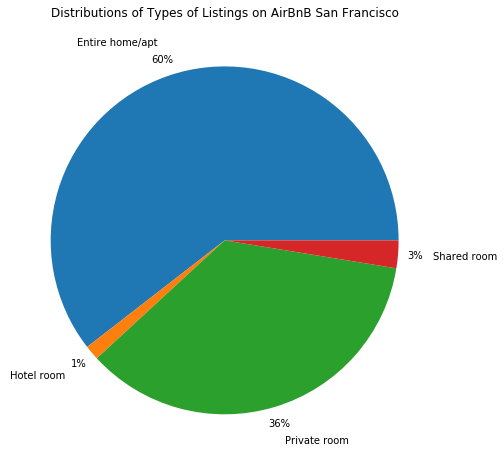

In [57]:
plt.figure(figsize = (8,8))
colors = ["dodgerblue", "gold", "salmon", "teal"]
plt.title("Distributions of Types of Listings on AirBnB San Francisco")

_=plt.pie(type_nums['id'], labels = type_nums ["Room Type"], autopct = "%.0f%%", pctdistance=1.1, labeldistance=1.2);

The histograms below show the distribution of prices of listings in San Francisco. The first histogram shows the distribution of prices of all listings (under 6000 dollars since we had removed all unreasonable lisitngs that were above 6000 dollars). Since the median price of the total listings is 140 dollars, the second histogram shows the distribution of prices of listings under 1000 dollars to give a more detailed picture of the price distribution.

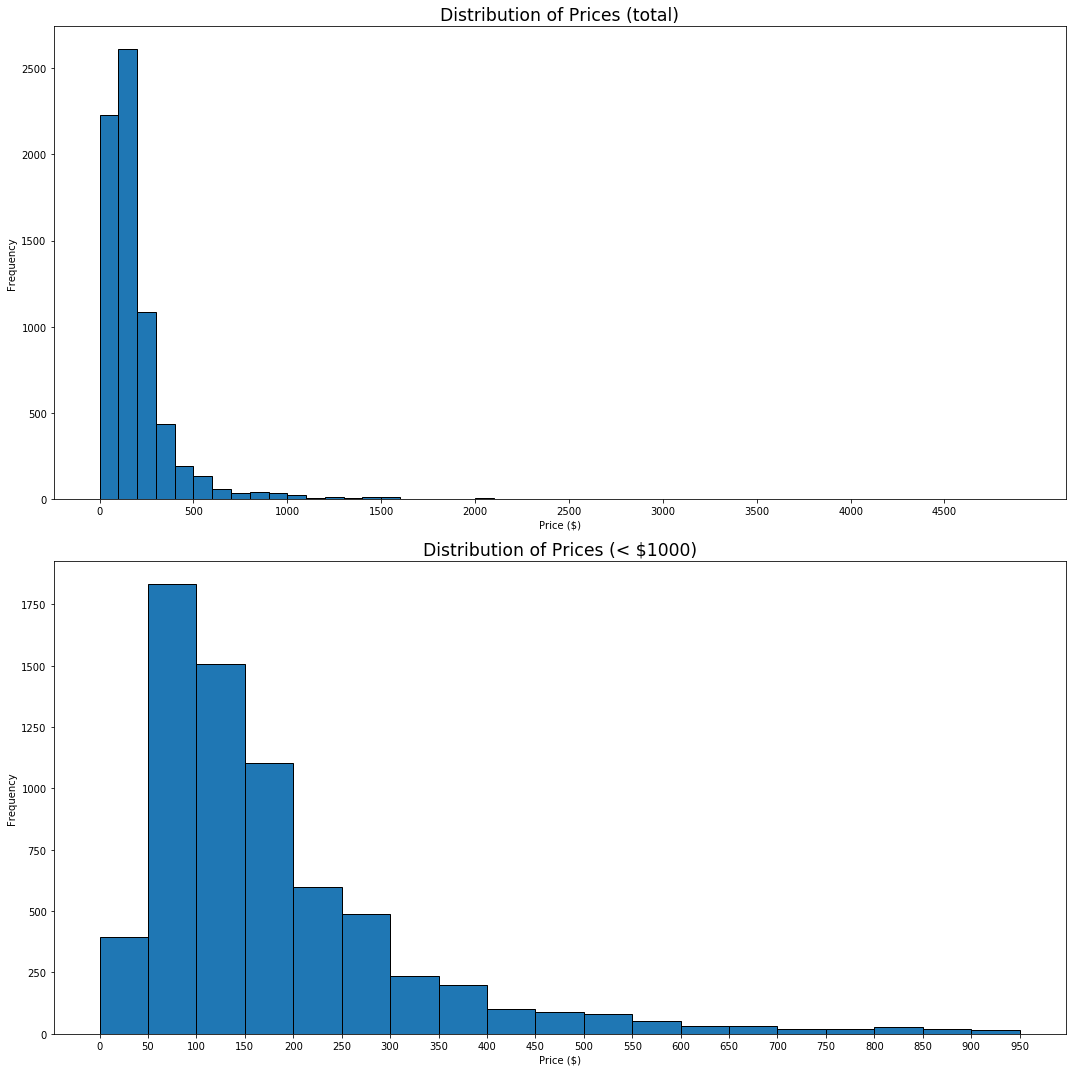

In [58]:
fig= plt.figure(figsize = (15, 15))

ax1 = plt.subplot(2,1,1)
plt.hist(airbnb["Price"], edgecolor = 'k',
        bins= np.arange(0, 5000, 100))
_ = plt.xticks(np.arange(0, 5000, 500))
ax1.set_title("Distribution of Prices (total)", size= "xx-large") 
plt.xlabel("Price ($)")
plt.ylabel("Frequency")

ax2 = plt.subplot(2,1,2)
plt.hist((airbnb[airbnb["Price"] < 1000]['Price']), edgecolor = 'k',
        bins= np.arange(0, 1000, 50))
_ = plt.xticks(np.arange(0, 1000, 50))
ax2.set_title("Distribution of Prices (< $1000)", size= "xx-large") 
plt.xlabel("Price ($)")
plt.ylabel("Frequency")

fig.tight_layout()
plt.show()  

In [59]:
mean_price_by_type = airbnb.groupby(["Room Type"]).agg({"Price" : "mean"})
mean_price_by_type

,Price
Room Type,
Entire home/apt,247.955819
Hotel room,277.505263
Private room,125.939798
Shared room,52.692737


The  bar graph below shows the average price per room type, which helps us understand which room types are most expensive. 

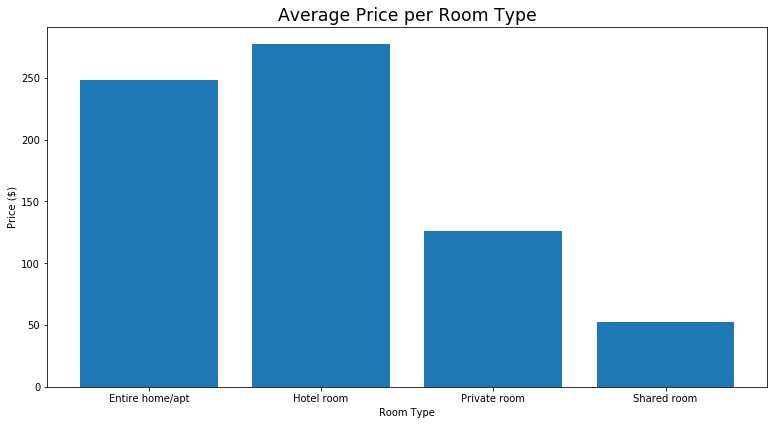

In [60]:
fig= plt.figure(figsize = (10, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(mean_price_by_type.index,mean_price_by_type["Price"])

plt.title("Average Price per Room Type", size= "xx-large")
plt.xlabel("Room Type")
plt.ylabel("Price ($)")

plt.show()

In [61]:
neighborhoods = airbnb.groupby(["Neighborhood"], as_index = False).agg({"Price" : "mean"})
neighborhoods = neighborhoods.sort_values("Price", ascending = False)
neighborhoods.head()

,Neighborhood,Price
28,Presidio Heights,382.863636
29,Russian Hill,323.988701
24,Pacific Heights,323.206667
15,Marina,320.076923
32,Twin Peaks,315.230769


This bar chart shows the neighborhoods with the most expensive mean listings from most to least expensive.  Presidio Heights is the neighborhood with the most expensive listings followed by Russian Hill.

<BarContainer object of 36 artists>

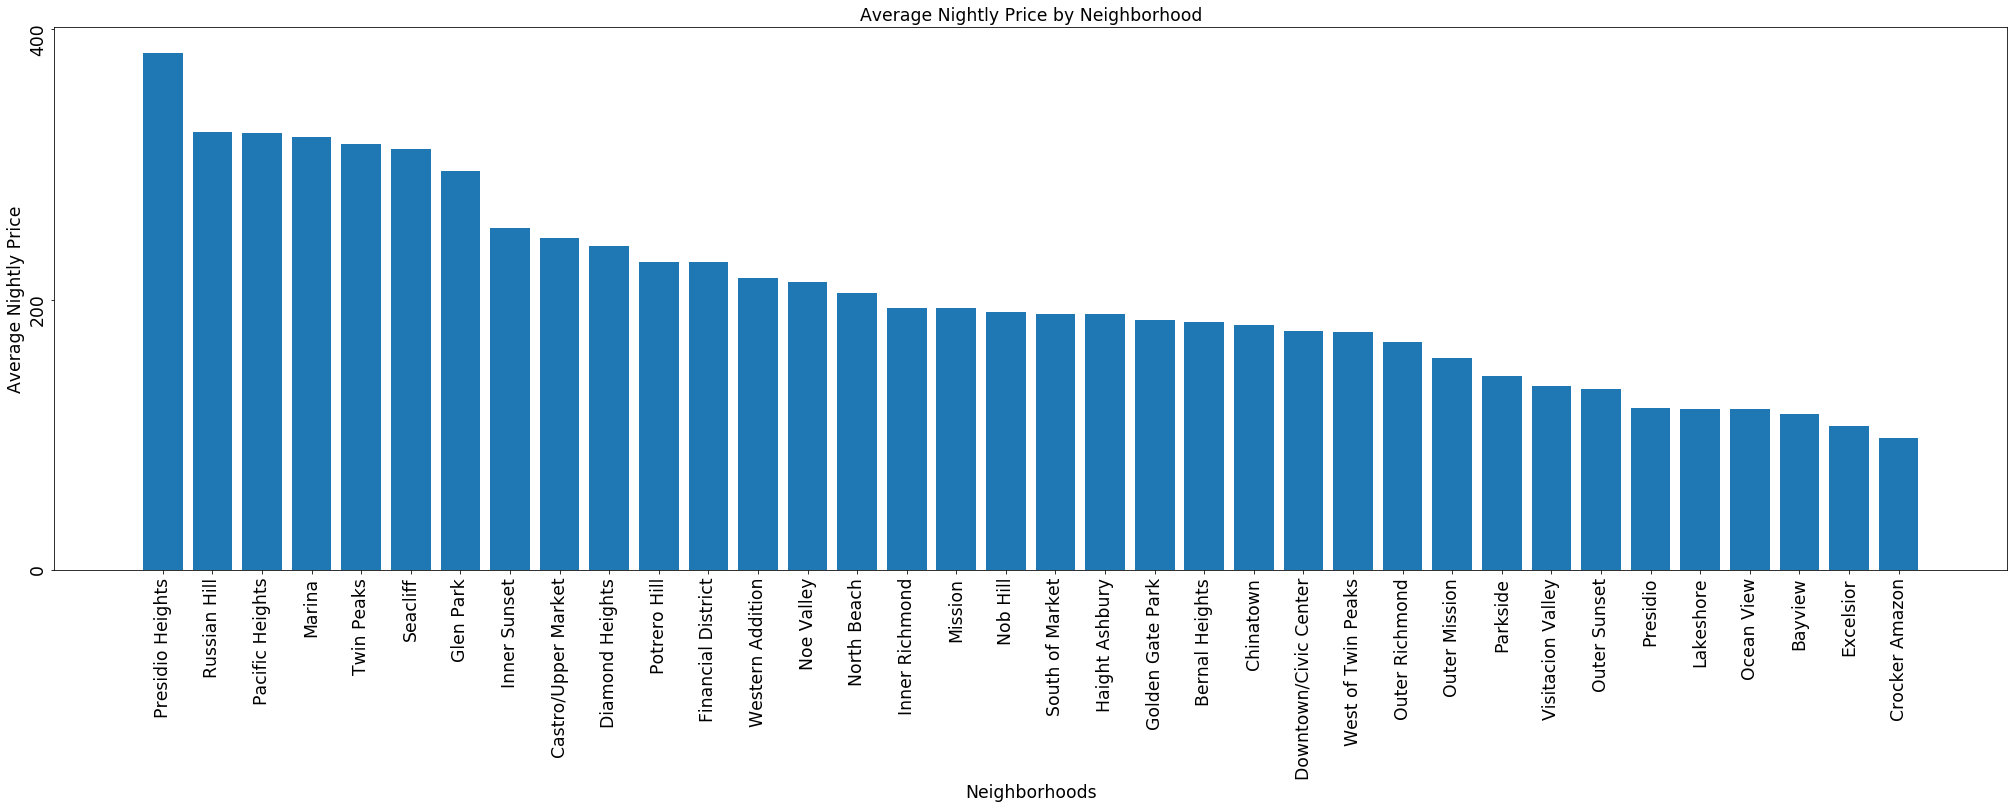

In [62]:
fig = plt.figure(figsize = (35,10))
plt.title('Average Nightly Price by Neighborhood', size = "xx-large")

plt.xlabel('Neighborhoods', size = 'xx-large')
plt.ylabel('Average Nightly Price', size = 'xx-large')

_= plt.xticks(size = "xx-large", rotation=90)
_= plt.yticks(np.arange(0,1610, 200),size = "xx-large", rotation=90)


plt.bar(x = neighborhoods ["Neighborhood"], height = neighborhoods ["Price"] )



This histogram shows the distribution of the number of listings each host has. As shown here, the majority have only 1, but there are some that up to 5, and then even smaller amounts all the way to 24 different listings. It's interesting to see what types of hosts have these listings on AirBnB. 

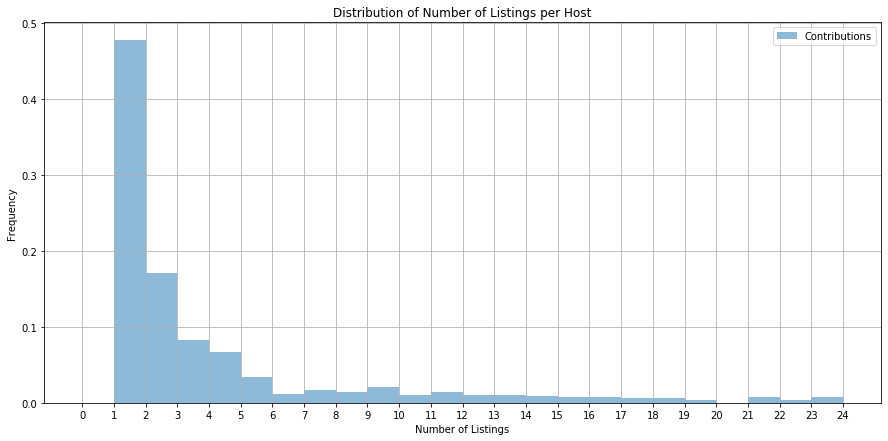

In [63]:
plt.figure(figsize = (15,7))
plt.xticks(np.arange(0, 25))

n, bins, patches = plt.hist(airbnb["Number of Host Listings"], bins=np.arange(0,25), alpha=0.5, label = "Contributions", density = True)

plt.title ("Distribution of Number of Listings per Host")
plt.xlabel('Number of Listings')
plt.ylabel('Frequency')
plt.grid('on')
plt.legend()

## Hypothesis 1 (copy from milestone 2)
(repeat this structure. 2 hypothesis per team member. Groups of 2 will do 4. Groups of 3 will do 6.)

Remember to hit all these points while testing your hypothesis

* What is your null hypothesis?

* What is your alternate hypothesis?

* What statistic are you picking in order to assess the validity of the null hypothesis?

* What is the observed value of the statistic?

* What significance level are you using? 

In [20]:
airbnb = pd.read_csv("data_stephanie_alegra_cleaned.csv")

In [64]:
mean_price_by_type = airbnb.groupby(["Room Type"]).agg({"Price" : "mean"})

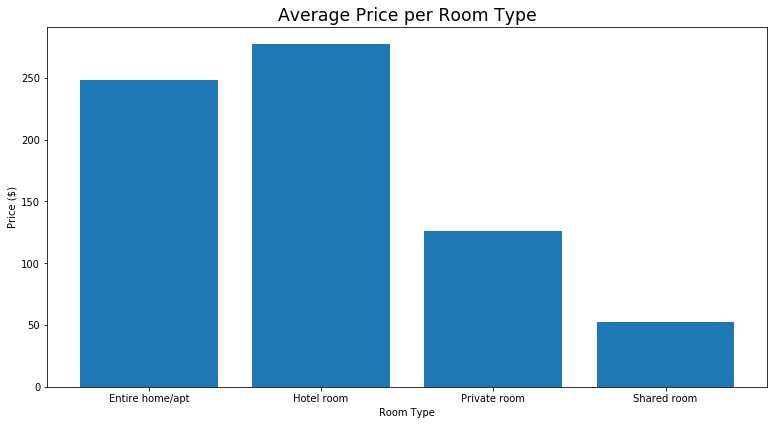

In [65]:
fig= plt.figure(figsize = (10, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(mean_price_by_type.index,mean_price_by_type["Price"])

plt.title("Average Price per Room Type", size= "xx-large")
plt.xlabel("Room Type")
plt.ylabel("Price ($)")

plt.show()

In [66]:
mean_price_by_type

,Price
Room Type,
Entire home/apt,247.955819
Hotel room,277.505263
Private room,125.939798
Shared room,52.692737


In [67]:
entire_price = 247.96
hotel_room_price = 277.5

## Hypothesis testing 

##### hypothesis 1 - 6/6

What is your null hypothesis?

H0: There is no difference between the prices of entire home/apt and a hotel room

What is your alternate hypothesis?

H1: There is difference between the price of an entire home/apartment and a hotel room

What statistic are you picking in order to assess the validity of the null hypothesis?

Mean/average prices

What is the observed value of the statistic? 29.539999999999992

Signficance level: alpha= 0.5

In [68]:
#observed difference
observed =hotel_room_price - entire_price
observed

29.539999999999992

In [69]:
iters = 1000
diffs = []
for i in np.arange(iters):
    
    shuffled = np.random.choice(airbnb["Room Type"], len(airbnb["Room Type"]), replace = False)
    
    entire_shuf = airbnb[shuffled == "Entire home/apt"]
    hotel_shuf = airbnb[shuffled == "Hotel room"]
    
    entire_mean_shuf = np.mean(entire_shuf["Price"])
    hotel_mean_shuf = np.mean(hotel_shuf["Price"])
    
    diff_shuf = hotel_mean_shuf - entire_mean_shuf
    
    diffs.append(diff_shuf)

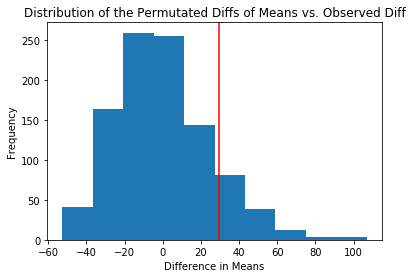

In [70]:
plt.hist(diffs)
plt.xlabel("Difference in Means")
plt.ylabel("Frequency")
plt.title("Distribution of the Permutated Diffs of Means vs. Observed Diff")
plt.axvline(x=observed, color='r')

In [71]:
p_val = 2*(np.sum(np.array(diffs) > observed) / len(diffs))
print("Our p-value:", p_val)

Our p-value: 0.26


Since our p value is 0.234 and it is greater than our alpha of .05, we cannot reject the null hypothesis. We made the test two tailed since we did not specify which direction the change in the null hypothesis would be in. 

## Hypothesis 2

## Data Cleaning and Visualization that leads to the second hypothesis

In [72]:
la_airbnb= pd.read_csv("lalistings.csv") #dataset from the same website as the SF airbnb dataset

In [73]:
la_airbnb = la_airbnb.drop(columns=["neighbourhood_group"])

In [74]:
la_airbnb = la_airbnb.rename(columns={'host_name' : 'Host Name', 'room_type' : 'Room Type',"number_of_reviews" : "Number of Reviews", "host_id" : "Host ID", "neighbourhood" : "Neighborhood",  "price" : "LA Price", "availability_365" : "Days of Availability (out of 365)", "calculated_host_listings_count" : "Number of Host Listings" })

In [75]:
la_airbnb["Booked Days"]= 365- la_airbnb["Days of Availability (out of 365)"]

Unlike the SF airbnb listings, the LA listings that are priced at more than 6,000 dollars are extremely luxuriosu 9+ bedroom villas, so we decided to keep them in the LA dataset. This makes more sense than the "less-than-average" hotel rooms listed at 24,000 dollars in the original SF airbnb datatset. However, we did remove the most expensive listing at 24,999 dollars, because this lisiting has lowered its price by almost 24,000 dollars and says it is booked 365/365 days, making it unreliable for our datatset. 

In [76]:
la_airbnb.sort_values("LA Price", ascending = False).head(5)

,id,name,Host ID,Host Name,Neighborhood,latitude,longitude,Room Type,LA Price,minimum_nights,Number of Reviews,last_review,reviews_per_month,Number of Host Listings,Days of Availability (out of 365),Booked Days
25287,42117412,"Sweeping Ocean Views, Open Concept, Pool/Spa &...",122055416,SeaBreeze,Malibu,34.04532,-118.88473,Entire home/apt,24999,3,0,NaN,NaN,3,0,365
10520,20471072,Bellagio Grand,23458477,Marina,Bel-Air,34.07713,-118.45484,Entire home/apt,21053,30,0,NaN,NaN,21,363,2
25002,41773858,Orum House,23458477,Marina,Bel-Air,34.08763,-118.46736,Entire home/apt,18000,30,0,NaN,NaN,21,365,0
22310,38839762,"Viceroy L'Ermitage, Presidential Suite",296569793,Viceroy L’Ermitage,Beverly Hills,34.07141,-118.39645,Private room,15000,1,0,NaN,NaN,11,196,169
14181,25870451,Petra Manor,198255538,Stuart,Malibu,34.04569,-118.68275,Entire home/apt,14500,3,1,2020-09-27,0.77,8,72,293


In [77]:
la_airbnb = la_airbnb[la_airbnb["LA Price"] < 22000]

In [78]:
la_airbnb.sort_values("LA Price", ascending = False).head(5)

,id,name,Host ID,Host Name,Neighborhood,latitude,longitude,Room Type,LA Price,minimum_nights,Number of Reviews,last_review,reviews_per_month,Number of Host Listings,Days of Availability (out of 365),Booked Days
10520,20471072,Bellagio Grand,23458477,Marina,Bel-Air,34.07713,-118.45484,Entire home/apt,21053,30,0,NaN,NaN,21,363,2
25002,41773858,Orum House,23458477,Marina,Bel-Air,34.08763,-118.46736,Entire home/apt,18000,30,0,NaN,NaN,21,365,0
22310,38839762,"Viceroy L'Ermitage, Presidential Suite",296569793,Viceroy L’Ermitage,Beverly Hills,34.07141,-118.39645,Private room,15000,1,0,NaN,NaN,11,196,169
14181,25870451,Petra Manor,198255538,Stuart,Malibu,34.04569,-118.68275,Entire home/apt,14500,3,1,2020-09-27,0.77,8,72,293
14184,25870842,Hillcrest,18269822,Brad,Beverly Hills,34.08982,-118.39899,Entire home/apt,14250,3,0,NaN,NaN,1,313,52


In [79]:
la_airbnb.shape

(31470, 16)

In [80]:
mean_price_by_type_la = la_airbnb.groupby(["Room Type"]).agg({"LA Price" : "mean"})

In [81]:
mean_price_by_type_la

,LA Price
Room Type,
Entire home/apt,287.595436
Hotel room,190.608974
Private room,99.755636
Shared room,53.151631


In [82]:
mean_price_by_type_sf = airbnb.groupby(["Room Type"]).agg({"Price" : "mean"})

In [83]:
mean_price_by_type_sf

,Price
Room Type,
Entire home/apt,247.955819
Hotel room,277.505263
Private room,125.939798
Shared room,52.692737


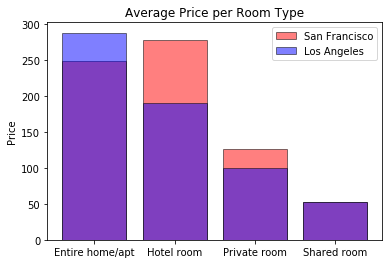

In [84]:
fig, ax = plt.subplots()

ax.bar(mean_price_by_type_sf.index, mean_price_by_type_sf["Price"], edgecolor = 'black', 
                           alpha = 0.5, color= "red", label='San Francisco')
ax.bar(mean_price_by_type_la.index,mean_price_by_type_la["LA Price"], edgecolor = 'black', 
                           alpha = 0.5, color= "blue", label = "Los Angeles")

ax.set_ylabel('Price')
ax.set_title('Average Price per Room Type')
ax.legend()

plt.show()

In [85]:
#of entire home/apt
la_price= 287.595436
sf_price= 247.955819

## Hypothesis Test #2

##### 5/6

- slight mistake in how you did the permutation test here --> you should filter out all the non home/apt listings and then shuffle whether a given airbnb location is in LA or in SF (rather than shuffling room type)

H0: There is no difference between the prices of entire home/apt between San Francisco and Los Angeles (mean LA prices of entire home/apt - mean SF prices of entire home/apt =0)

H1: The prices of entire home/apt lisitngs in LA is greater than those in SF. (mean LA prices of entire home/apt - mean SF prices of entire home/apt > 0)

Test statistic: mean of entire home/apt prices.

alpha= 0.5

Observed value of the statistic is below.

In [86]:
observed = la_price - sf_price
observed

39.639617000000015

In [87]:
la_airbnb.head(1)

,id,name,Host ID,Host Name,Neighborhood,latitude,longitude,Room Type,LA Price,minimum_nights,Number of Reviews,last_review,reviews_per_month,Number of Host Listings,Days of Availability (out of 365),Booked Days
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Culver City,33.98209,-118.38494,Entire home/apt,115,30,2,2016-05-15,0.02,1,216,149


In [88]:
airbnb.head(1)

,Unnamed: 0,id,name,Host ID,Host Name,Neighborhood,latitude,longitude,Room Type,Price,minimum_nights,Number of Reviews,last_review,reviews_per_month,Number of Host Listings,Days of Availability (out of 365),Booked Days
0,0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Western Addition,37.76931,-122.43386,Entire home/apt,131,2,262,2020-09-16,1.92,1,206,159


In [89]:
iters = 1000
diffs_city = []
for i in np.arange(iters):
    
    shuffled_la = np.random.choice(la_airbnb["Room Type"], len(la_airbnb["Room Type"]), replace = False)
    shuffled_sf = np.random.choice(airbnb["Room Type"], len(airbnb["Room Type"]), replace = False)
    
    la_shuf = la_airbnb[shuffled_la == "Entire home/apt"]
    sf_shuf = airbnb[shuffled_sf == "Entire home/apt"]
    
    la_mean_shuf = np.mean(la_shuf["LA Price"])
    sf_mean_shuf = np.mean(sf_shuf["Price"])
   
    diff_shuf = la_mean_shuf - sf_mean_shuf
    
    diffs_city.append(diff_shuf)

In [90]:
observed

39.639617000000015

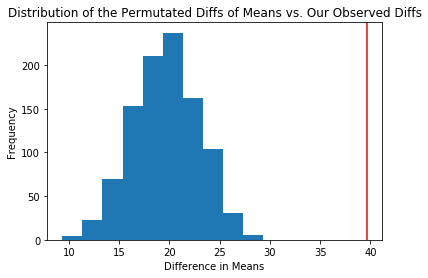

In [91]:
plt.hist(diffs_city)
plt.xlabel("Difference in Means")
plt.ylabel("Frequency")
plt.title("Distribution of the Permutated Diffs of Means vs. Our Observed Diffs")
plt.axvline(x=observed, color='r')

In [92]:
p_val = np.sum(np.array(diffs_city) > observed) / len(diffs_city)
print("Our p-value:", p_val)

Our p-value: 0.0


Since our p-value is 0.0, which is less than the alpha value, we can reject the null hypothesis and accept the alternative hypothesis that the prices of entire home/apt lisitngs in LA is greater than those in SF. 

## Hypothesis Test #3

##### 5.5/6

- calculate correlation btwn variables of interest (in addition to the scatterplot you already made) when testing a regression as we've done in past hws

In [95]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Ho: There is not relationship between price and number of reviews, where price is not dependent on number of reviews (slope = 0).

H1: There is a negative relationship between price and number of reviews, where price is dependent on number of reviews (slope is less than 0).

Test statisitc: Regression coefficient

The observed regression coefficient of the slope is -0.2808.

alpha = 0.5

In [96]:
airbnb_3= airbnb.rename(columns = {"Number of Reviews" : "Reviews",})

In [97]:
mod1 = smf.ols(formula='Price ~ Reviews', data=airbnb_3) #price is dependent on the number of reviws

In [98]:
mod1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     68.09
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           1.85e-16
Time:                        10:25:21   Log-Likelihood:                -47865.
No. Observations:                6959   AIC:                         9.573e+04
Df Residuals:                    6957   BIC:                         9.575e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    212.7108      3.213     66.194      0.000     206.412     219.010
Reviews       -0.2808      0.034     -8.252      0.000      -0.348      -0.214
==============================================================================
Omnibus:                     8644.641   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1862299.611
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      82.041   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Under the null hypothesis of slope = 0, we would like to see if is ever possible to get a regression coefficient that is as extreme. 

We will test this below.

In [99]:
observed_coeff= -0.2808

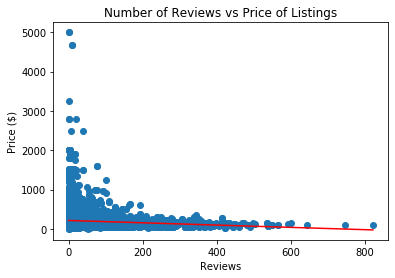

In [100]:
airbnb_3 = airbnb_3.sample(len(airbnb_3), replace = True) 

plt.scatter(airbnb_3["Reviews"], airbnb_3["Price"])
m, b = np.polyfit(airbnb_3["Reviews"], airbnb_3["Price"], deg = 1)

x_min = np.min(airbnb_3["Reviews"])
x_max = np.max(airbnb_3["Reviews"])

plt.title("Number of Reviews vs Price of Listings")
plt.xlabel("Reviews")
plt.ylabel("Price ($)")

plt.plot([x_min, x_max], [m*x_min + b, m*x_max + b], 'red');

To find the range of slopes:

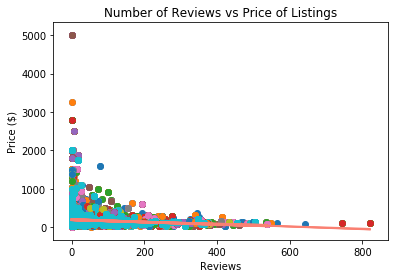

In [101]:
for i in np.arange(50):
    airbnb_3 = airbnb_3.sample(len(airbnb_3), replace = True) 
    plt.scatter(airbnb_3["Reviews"], airbnb_3["Price"])
    m, b = np.polyfit(airbnb_3["Reviews"], airbnb_3["Price"], deg = 1)
    x_min = np.min(airbnb_3["Reviews"])
    x_max = np.max(airbnb_3["Reviews"])
    
    plt.title("Number of Reviews vs Price of Listings")
    plt.xlabel("Reviews")
    plt.ylabel("Price ($)")
    
    plt.plot([x_min, x_max], [m*x_min + b, m*x_max + b], color = "salmon")

It seems like there is a sign of flatness to the slope, so we then decided to find the confidence interval.

In [120]:
slopes = []
for i in np.arange(1000):
    airbnb_3 = airbnb_3.sample(len(airbnb_3), replace = True)
    
    m, b = np.polyfit(airbnb_3["Reviews"], airbnb_3["Price"], deg = 1)
    slopes.append(m)

C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly con

C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly con

C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly con

C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly con

C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly con

C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly con

C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly con

C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly con

C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly con

C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly con

C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\balas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly con

Text(0, 0.5, 'Frequency')

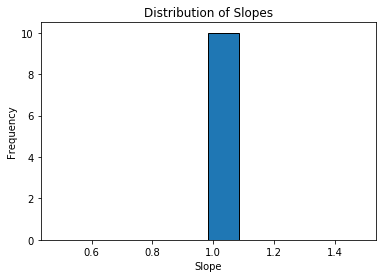

In [121]:
plt.hist(slopes, ec = 'k', density= 1);

plt.title("Distribution of Slopes")
plt.xlabel("Slope")
plt.ylabel("Frequency")

In [104]:
def bootstrap_for_slope(df, x, y, repeats):
    slopes = []
    for i in np.arange(repeats):
        df_sam = df.sample(len(df), replace = True)
        m, b = np.polyfit(df_sam[x], df_sam[y], deg = 1)
        slopes.append(m)
    right = np.percentile(slopes, 97.5)
    left = np.percentile(slopes, 2.5)
    print("The 95 % confidence interval is " + str(left) + " to " + str(right))

In [115]:
bootstrap_for_slope(airbnb_3, "Reviews", "Price", 10000)

The 95 % confidence interval is -1.2540872269575971 to -1.0514885048373612


In [112]:
p_val = np.sum(np.array(slopes) >= 0) / len(slopes)
print("Our p-value:", p_val)

Our p-value: 0.0


Our p-value is 0.0 which is less than our alpha value of 0.5. This means that the slopes of the regression lines will not be greater than or equal to zero. Therefore, we can reject the null hypothesis and accept the alternative hypothesis that there is a negative relationship between price and number of reviews, where price is dependent on number of reviews.

## Hypothesis Test #4

##### 6/6

In [66]:
airbnb = pd.read_csv("data_stephanie_alegra_cleaned.csv")

In [122]:
neighborhoods = airbnb.groupby(["Neighborhood"], as_index = False).agg({"Price" : "mean"})
neighborhoods = neighborhoods.sort_values("Price", ascending = False)
neighborhoods.head()

,Neighborhood,Price
28,Presidio Heights,382.863636
29,Russian Hill,323.988701
24,Pacific Heights,323.206667
15,Marina,320.076923
32,Twin Peaks,315.230769


<BarContainer object of 36 artists>

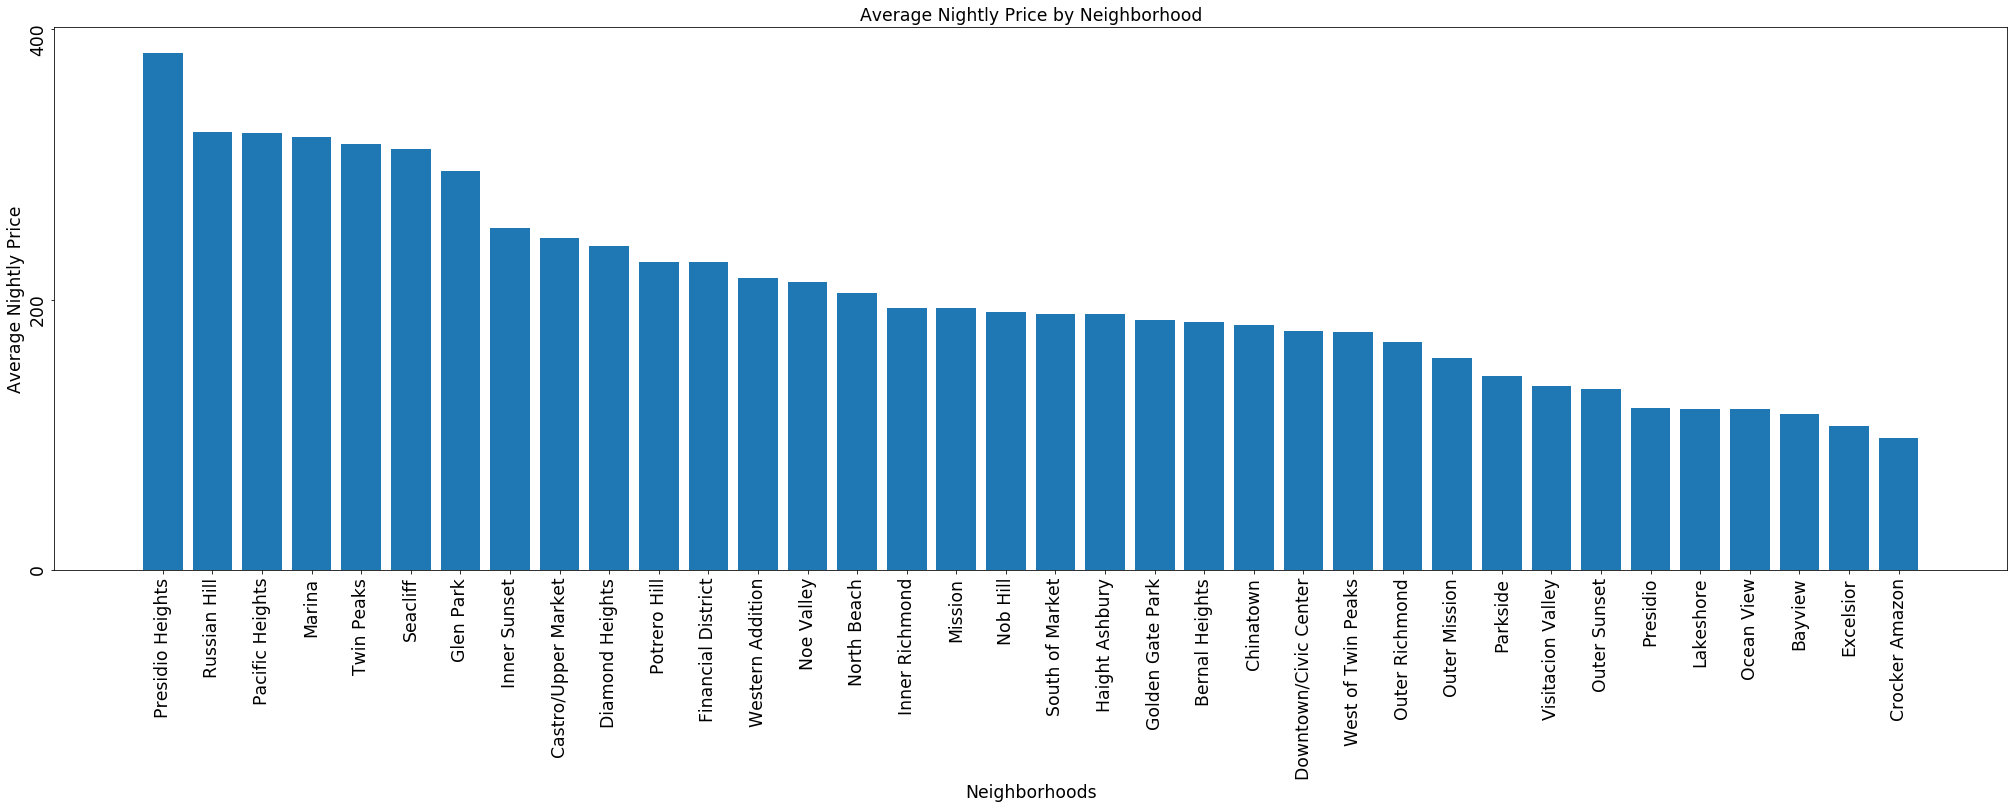

In [123]:
fig = plt.figure(figsize = (35,10))
plt.title('Average Nightly Price by Neighborhood', size = "xx-large")

plt.xlabel('Neighborhoods', size = 'xx-large')
plt.ylabel('Average Nightly Price', size = 'xx-large')

_= plt.xticks(size = "xx-large", rotation=90)
_= plt.yticks(np.arange(0,1610, 200),size = "xx-large", rotation=90)


plt.bar(x = neighborhoods ["Neighborhood"], height = neighborhoods ["Price"] )



Hypothesis

    H0: prices of rentals in Presidio Heights is no different than Russian Hill

    H1: prices of rentals in Presidio Heights are higher than those Russian Hill
 
Test statistic: mean prices

Alpha = .05

In [124]:
#Observed value
presidio = 382.86
russsian_hill = 323.98

observed_2 = presidio - russsian_hill
observed_2

58.879999999999995

In [125]:
neighborhoods = airbnb.groupby(["Neighborhood"], as_index = False).agg({"Price" : "mean"})
neighborhoods = neighborhoods.sort_values("Price", ascending = False)
neighborhoods.head()

,Neighborhood,Price
28,Presidio Heights,382.863636
29,Russian Hill,323.988701
24,Pacific Heights,323.206667
15,Marina,320.076923
32,Twin Peaks,315.230769


In [126]:
mean_price_by_type = airbnb.groupby(["Room Type"]).agg({"Price" : "mean"})

In [127]:
iters = 1000
diffs_2 = []
for i in np.arange(iters):

    shuffled_2 = np.random.choice(airbnb["Neighborhood"], len(airbnb["Neighborhood"]), replace = False)

    pres_shuf = airbnb[shuffled_2 == "Presidio"]
    russ_shuf = airbnb[shuffled_2 == "Russian Hill"]
    

    pres_mean_shuf = np.mean(pres_shuf["Price"])
    russ_mean_shuf = np.mean(russ_shuf["Price"])
    

    diff_shuf_2 = pres_mean_shuf - russ_mean_shuf

    diffs_2.append(diff_shuf_2)

In [128]:
observed_2

58.879999999999995

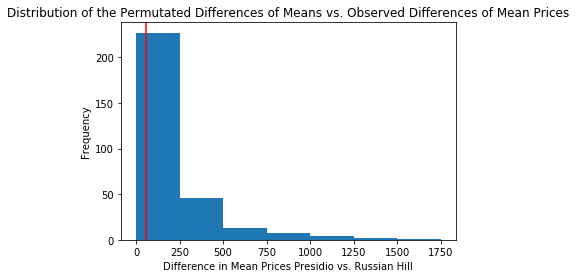

In [129]:
bin_list = np.arange(0,2000,250)
n, bins, patches = plt.hist(diffs_2, bins = bin_list)
plt.xlabel("Difference in Mean Prices Presidio vs. Russian Hill")

plt.ylabel("Frequency")
plt.title("Distribution of the Permutated Differences of Means vs. Observed Differences of Mean Prices")
plt.axvline(x=observed_2, color='r')

In [130]:
p_val = np.sum(np.array(diffs_2) > observed_2) / len(diffs_2)
print("Our p-value:", p_val)

Our p-value: 0.215


Since our p value is 0.201 and it is greater than our alpha of .05, we cannot reject the null hypothesis that prices of rentals in Presidio Heights is no different than Russian Hill.


## Conclusion / What are most important takeaways from this project?

##### 10/10

Overall, we found that there was also no significant difference between the price of an entire home/apartment and a hotel room in San Francisco and that the prices of rentals in Presidio Heights is not significantly different than Russian Hill. So if you are planning to stay in a nice place in San Francisco, you may be better off staying in a hotel room in Presidio Heights than in Russian Hill. 

We also found that the prices of entire home/apt lisitngs in Los Angeles is greater than those in San Francsico. This makes sense as there are more luxurious listings in the Los Angeles area and if you are deciding between the two areas for a vacation, San Francsico may be cheaper for you. 


Most importantly, our third hypothesis test showed that there was a negative correlation between number of reviews and price, where price is dependent on number of reviews. This was a really interesting take away that was reflected in my partner and I's experience with AirBnb. We spoke about how we're much more likely to book an airbnb if there are a substantial number of reviews, potentially increasing demand for airbnbs with many reviews and therefore allowing owners to raise prices. However, we found that with more reviews, the price actually decreases, perhaps signifying that more reviews reflect more demand for the lisiting and therefore, rental owners will lower the price to capture more customers. In general it was interesting to understand that even if there is no apparent relationship if a dataset has many entries a small relationship may be statistically significant. It was interesting to test of hypothesis which we had little faith in but turned out to surprise us. 

##### Meeting with TA, submitting data, commenting code --> 14/14